In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv')

# Display first few rows to inspect
print(df.head())

# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Weekend'] = df['DayOfWeek'] >= 5

# Sum the cyclist counts from East and West sidewalks to get total counts
# Adjust the column names if they are different
df['TotalCyclists'] = df.iloc[:, 1:3].sum(axis=1)

# Drop rows with missing values
df = df.dropna()

# Prepare features and target
X = df[['Hour', 'DayOfWeek', 'Month', 'Weekend']]
y = df['TotalCyclists']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Bicycle Trips')
plt.show()

# Analyze hourly commute data
hourly_data = df.groupby('Hour')['TotalCyclists'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index, hourly_data.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Cyclists')
plt.title('Average Number of Cyclists by Hour of the Day')
plt.show()



Mean Absolute Error: 49.436542935718954


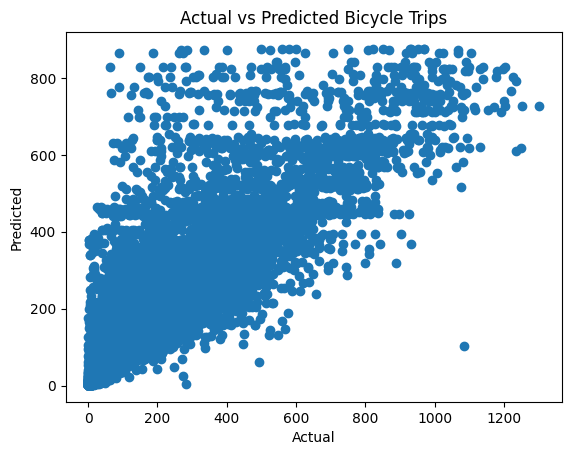